In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import PIL
import os

In [2]:
def load_data(dataset, standardize=True):
    """
    :param dataset:
    :param standardize:
    :return:
    """

    features = dataset['arr'][:, 0]
    features = np.array([feature for feature in features])
    features = np.reshape(features, (features.shape[0], features.shape[1] * features.shape[2]))

    if standardize:
        features = StandardScaler().fit_transform(features)

    labels = dataset['arr'][:, 1]
    labels = np.array([label for label in labels])

    return features, labels


def create_dataframe(path):
    columnas = []
    etiqueta = []
    df = {}
    for i in range(1,1025):
        columnas.append("pixel"+str(i))
    labels = os.listdir("./malimg_paper_dataset_imgs")
    contador = 0
    for i in labels:
        for j in os.listdir("./malimg_paper_dataset_imgs/"+i):
            img = PIL.Image.open("./malimg_paper_dataset_imgs/"+i+"/"+j).convert('LA')
            img = img.resize((32, 32))
            arr1 = np.array(img.getdata(0))
            etiqueta.append(i)
            df[contador] = arr1
            contador = contador + 1      
    df2 = pd.DataFrame(df).T
    df2.columns = columnas
    df3 = pd.DataFrame(etiqueta,columns = ['label'])  
    df_final =pd.concat([df2, df3], axis=1)
    return df_final

            
            
            
        
        

In [3]:
df = create_dataframe("./malimg_paper_dataset_imgs")

In [4]:
X_df = df.drop('label', axis=1)
y_df = df['label']

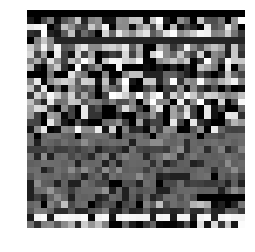

In [7]:
X_df.values[0]
plt.imshow(X_df.values[0].reshape(32, 32), cmap="gray")
plt.axis('off')
plt.show()

24


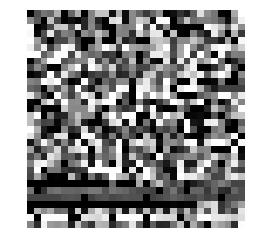

In [48]:
#Testeo de imagenes del Dataset
data = np.load('./malimg.npz')
foto = data['arr'][9000][0]
print(data['arr'][9000][1])
plt.imshow(foto.reshape(32, 32), cmap="gray")
plt.axis('off')
plt.show()

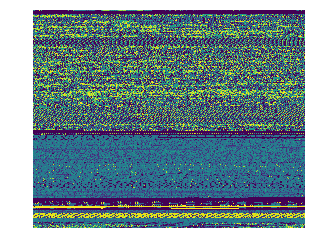

In [86]:
#Test Resize manualmente para otro pre-procesamiento
from skimage import io
from skimage.transform import rescale, resize, downscale_local_mean
image = io.imread("./malimg_paper_dataset_imgs/Adialer.C/000bde2e9a94ba41c0c111ffd80647c2.png")
plt.imshow(image)
plt.axis('off')
plt.show()

/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


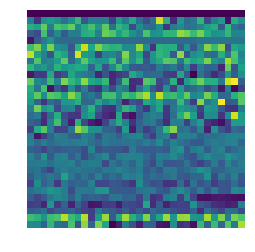

In [155]:
from skimage.transform import rescale, resize, downscale_local_mean
image_resized = resize(image, (32,32))
plt.imshow(image_resized)
plt.axis('off')
plt.show()

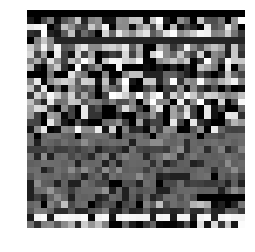

In [192]:
img = PIL.Image.open("./malimg_paper_dataset_imgs/Adialer.C/000bde2e9a94ba41c0c111ffd80647c2.png").convert('LA')
img = img.resize((32, 32))
arr = np.array(img.getdata(0))
plt.imshow(np.array(arr).reshape(32, 32), cmap="gray")
plt.axis('off')
plt.show()

In [63]:
dataset = np.load('./malimg.npz')
features, labels = load_data(dataset=dataset)
# split the dataset by 70/30
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30,stratify=labels)

/home/gabo/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [64]:
X_train

array([[ 1.4140203 ,  1.40683431,  1.75388036, ...,  0.98437205,
        -1.14217096,  0.76713529],
       [-0.64927367, -0.71776896, -0.75843253, ...,  0.95818614,
        -0.95592867, -0.13561412],
       [ 0.7911391 ,  1.19168461,  0.64846269, ...,  1.4426256 ,
        -0.19765648, -0.59270244],
       ..., 
       [-0.64927367, -0.71776896, -0.75843253, ..., -1.3330816 ,
        -1.00914075, -0.42129432],
       [ 1.02471955,  0.57312923,  2.2689045 , ...,  0.12023679,
         0.24134321, -1.33547094],
       [-0.64927367, -0.71776896, -0.75843253, ...,  0.81416359,
         1.87761477,  1.01853387]])